# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Anak Agung Istri Istadewanti
- **Email:** gung.ista@gmail.com
- **ID Dicoding:** ista03

## Menentukan Pertanyaan Bisnis

Dataset yang digunakan membahas terkait jumlah sepeda yang disewa dalam hitungan hari antara tahun 2011 dan 2012. Sepeda yang disewa ini menggunakan sistem bike sharing di mana seluruh proses mulai dari membership, teknis penyewaan, hingga teknis pengembalian sepeda telah menjadi otomatis. Hal ini pastinya membuat penyewa menjadi lebih fleksibel dalam mengembalikan sepeda karena tidak harus mengembalikannya pada posisi awal tempat penyewaan.

Saat itu sistem bike sharing telah banyak menarik minat masyarakat. Selain karena sistem yang mudah, sistem ini memiliki peran penting dalam masalah lalu lintas, lingkungan, dan kesehatan. Meskipun begitu, terdapat faktor lain yang dapat mempengaruhi jumlah sepeda yang disewa dalam waktu 1 hari. Oleh karena itu, akan dilakukan analisis lebih lanjut terkait penyewaan sepeda dengan mengacu pada pertanyaan bisnis di bawah ini:

- Bagaimana performa jasa sewa sepeda (bike sharing) dalam 2 tahun terakhir (2011 dan 2012)?
- Apakah hari kerja (working day) memberi dampak langsung pada jumlah sepeda yang disewa?
- Bagaimana hubungan cuaca dan musim dengan pola customer dalam menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
from google.colab import files
import zipfile, io, os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Data wrangling merupakan tahapan awal sebelum data digunakan dalam proses analisis data.

### Gathering Data

Data wrangling dimulai dengan **gathering data atau proses pengumpulan data**. Dataset yang akan digunakan adalah file "day.csv" yang berasal dari https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view?usp=sharing. Dataset ini memuat banyak variabel diantaranya, yaitu:


•	**instant** : nomor rekaman terkait penyewaan sepeda setiap harinya

•	**dteday** : tanggal sewa sepeda

•	**season** : 1 = musim salju, 2 = musim semi, 3 = musim panas, 4 = musim gugur

•	**yr**        : tahun peminjaman di mana 0 = tahun 2011 dan 1 = tahun 2012

•	**mnth**   : bulan (dari 1 hingga 12 merepresentasikan dari Januari hingga Desember)


•	**holiday**: liburan bernilai 1 = untuk libur dan 0 = tidak libur

•	**weekday** : hari dalam 1 minggu (Senin hingga Minggu)

•	**workingday** : libur/akhir pekan = 0, tidak libur/hari kerja = 1

•	**weathersit** : 1 = cerah, 2 = Sedikit awan, 3 = Sebagian berawan

•	**temp**     : suhu normal dalam Celcius

•	**atemp**   : suhu yang dirasakan dalam Celcius

•	**hum**     : kelembapan normal

•	**windspeed** : kecepatan angin

•	**casual**   : jumlah pengguna biasa

•	**registered** : jumlah pengguna yang mendaftar

•	**cnt**         : jumlah total sepeda yang disewa termasuk (casual dan registered)


In [2]:
uploaded = files.upload()

Saving Bike-sharing-dataset.zip to Bike-sharing-dataset.zip


In [3]:
zip_file = list(uploaded.keys())[0]

# Mengekstrak file ZIP
with zipfile.ZipFile(io.BytesIO(uploaded[zip_file]), 'r') as zip_ref:
    zip_ref.extractall('/tmp/bikesharing')

# Melihat isi direktori
print(os.listdir('/tmp/bikesharing'))

['day.csv', 'Readme.txt', 'hour.csv']


In [4]:
# Mengambil path file csv
file_path = '/tmp/bikesharing/day.csv'

# Mengambil data pada file day.csv
bikesharing_df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Selanjutnya adalah **assesing data atau penilaian terhadap data yang dimiliki**. Hal ini untuk mengidentifikasi berbagai masalah yang mungkin terjadi dalam dataset, seperti missing value, invalid value, dan sebagainya.

In [5]:
# Menilai data dalam df
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi di atas dapat dilihat bahwa data yang dimiliki tidak memiliki *missing value* karena jumlah seluruh kolom telah sama. Namun, terdapat tipe data yang salah, di mana kolom "dteday" seharusnya bertipe datetime. Hal ini akan kita ubah pada tahap cleaning data nanti.

In [6]:
# Memeriksa data duplikat pada df
print("Jumlah duplikasi: ", bikesharing_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Melihat rentang nilai pada df
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Data yang dimiliki tidak ada yang duplikat, sehingga kita tidak perlu melakukan penghapusan data pada saat pembersihan nanti. Selain itu, data yang dimiliki telah sesuai dan telah dinormalisasi, sehingga tidak terdapat outlier.

### Cleaning Data

Tahap terakhir pada data wrangling adalah **cleaning data atau membersihkan data** sebelum masuk ke dalam tahap analisis data.

Pada tahap ini, kita akan mengubah tipe data kolom "dteday" menjadi datetime. Kemudian, kolom yang tidak begitu berpengaruh dalam proses analisis akan dihilangkan, seperti kolom "instant".

In [8]:
# Mengubah tipe data "dteday"

bikesharing_df['dteday'] = pd.to_datetime(bikesharing_df['dteday'])

In [9]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Kolom "dteday" kini telah berubah menjadi tipe data datetime.

Selanjutnya kita akan menghapus kolom yang tidak akan digunakan dalam proses analisis.

In [10]:
bikesharing_df.drop(columns=['instant', 'holiday', 'temp', 'atemp', 'hum', 'windspeed'], inplace=True)

In [11]:
# Mengganti nilai 0 dengan 2011 dan nilai 1 dengan 2012 pada kolom 'yr'
bikesharing_df['yr'] = bikesharing_df['yr'].replace({0: 2011, 1: 2012})

In [12]:
bikesharing_df.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,2011,1,6,0,2,331,654,985
1,2011-01-02,1,2011,1,0,0,2,131,670,801
2,2011-01-03,1,2011,1,1,1,1,120,1229,1349
3,2011-01-04,1,2011,1,2,1,1,108,1454,1562
4,2011-01-05,1,2011,1,3,1,1,82,1518,1600


## Exploratory Data Analysis (EDA)

**EDA** adalah tahapan dimana kita akan melakukan eksplorasi data untuk mendapatkan insight dan dapat menjawab pertanyaan bisnis.


Sebagai penyedia jasa sepeda, akan dicari tahu terkait performa sepeda yang disewa dalam 2 tahun terakhir dan pola atau perilaku dari pelanggan agar dapat mengetahui metode pemasaran yang tepat. Eksplorasi data di sini akan mengacu untuk menjawab pertanyaan bisnis yang telah disebutkan di awal.

### Explore bikesharing_df

"bikesharing_df" adalah dataframe yang memuat informasi seputaran penyewaan sepeda.


In [13]:
bikesharing_df.describe(include="all")

<ipython-input-13-471a95750d1e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bikesharing_df.describe(include="all")


,dteday,season,yr,mnth,weekday,workingday,weathersit,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.496580,2011.500684,6.519836,2.997264,0.683995,1.395349,848.176471,3656.172367,4504.348837
std,NaN,1.110807,0.500342,3.451913,2.004787,0.465233,0.544894,686.622488,1560.256377,1937.211452
min,NaN,1.000000,2011.000000,1.000000,0.000000,0.000000,1.000000,2.000000,20.000000,22.000000
25%,NaN,2.000000,2011.000000,4.000000,1.000000,0.000000,1.000000,315.500000,2497.000000,3152.000000


Dari tabel di atas kita dapat mengetahui seluruh informasi terkait nilai kolom yang kita miliki. Jumlah sepeda yang paling banyak disewa pada tahun 2011 dan 2012 adalah 8.714, sedangkan paling sedikit adalah 22.

In [14]:
totalbike_year = bikesharing_df.groupby('yr')['cnt'].sum()

print(totalbike_year)

yr
2011    1243103
2012    2049576
Name: cnt, dtype: int64


Dapat diketahui bahwa jumlah sepeda yang disewa mengalami peningkatan dari tahun 2011 ke tahun 2012.

In [15]:
totaltype_year = bikesharing_df.groupby('yr')[['casual', 'registered']].sum()

print("Total peminjaman sepeda per tahun:")
print(totaltype_year)

Total peminjaman sepeda per tahun:
      casual  registered
yr                      
2011  247252      995851
2012  372765     1676811


Setiap tahunnya, customer registered atau telah terdata keanggotaannya selalu lebih banyak dibandingkan dengan customer casual.

In [16]:
totalbike_season = bikesharing_df.groupby(['yr', 'season'])['cnt'].sum()

print(totalbike_season)

yr    season
2011  1         150000
      2         347316
      3         419650
      4         326137
2012  1         321348
      2         571273
      3         641479
      4         515476
Name: cnt, dtype: int64


Berdasarkan musimnya, sepeda paling banyak disewa saat musim panas dan paling sedikit disewa saat musim salju. Penyewaan ini memiliki pola musiman karena di setiap tahunnya jumlah terbanyak dan terdikit selalu berada pada musim yang sama.

In [17]:
totalbike_workingday = bikesharing_df.groupby('workingday')['cnt'].sum()

print(totalbike_workingday)

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


Jika dilihat menggunakan "workingday", orang-orang lebih banyak melakukan peminjaman sepeda pada saat hari kerja/tidak libur (ditandai dengan '1') dibandingkan pada saat libur ('0').

In [18]:
totalbike_weather = bikesharing_df.groupby('weathersit')['cnt'].sum()

print(totalbike_weather)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64


Berdasarkan cuacanya, orang lebih cenderung menyewa sepeda pada cuaca cerah dibandingkan saat cuaca sebagian berawan atau tidak cerah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana performa penyewaan sepeda dalam 2 tahun terakhir (2011 dan 2012)?

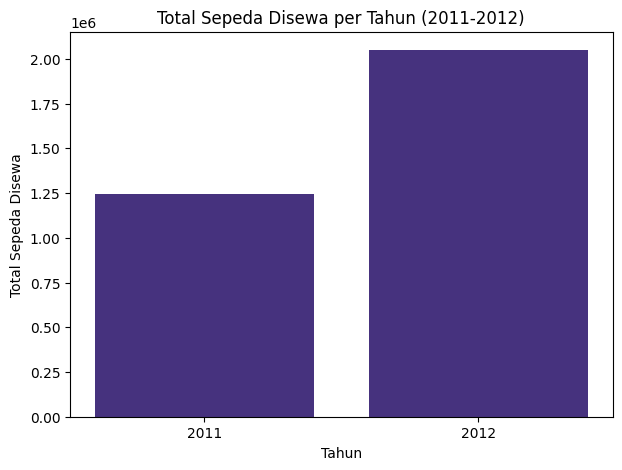

In [19]:
sns.set_palette('viridis')

plt.figure(figsize=(7, 5))
plt.bar(totalbike_year.index.astype(str), totalbike_year, color=sns.color_palette()[::-1][-1])
plt.title('Total Sepeda Disewa per Tahun (2011-2012)')
plt.xlabel('Tahun')
plt.ylabel('Total Sepeda Disewa')
plt.show()

Peningkatan jumlah total penyewaan sepeda dari tahun 2011 ke tahun 2012 menunjukkan adanya peningkatan minat serta penyesuaian masyarakat terhadap layanan penyewaan sepeda.

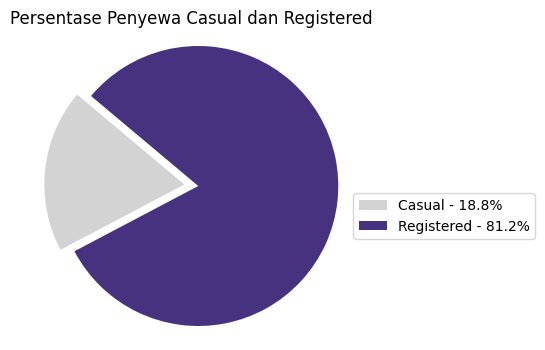

In [20]:
# Menghitung jumlah total penyewa casual dan registered
total_casual = bikesharing_df['casual'].sum()
total_registered = bikesharing_df['registered'].sum()

labels = ['Casual', 'Registered']
sizes = [total_casual, total_registered]

colors = ['lightgrey', sns.color_palette()[::-1][-1]]

explode = (0, 0.1)

plt.figure(figsize=(4, 4))
plt.pie(sizes, startangle=140, colors=colors, explode=explode, pctdistance=0.85)
plt.axis('equal')
plt.title('Persentase Penyewa Casual dan Registered')

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), labels=['{} - {:.1f}%'.format(label, size/sum(sizes)*100) for label, size in zip(labels, sizes)])
plt.show()


Meskipun pengguna terdaftar (registered) selalu lebih banyak, peningkatan jumlah pengguna casual menunjukkan potensi pertumbuhan lebih lanjut.

### Pertanyaan 2:

Apakah hari kerja memberi dampak langsung pada jumlah sepeda yang disewa?

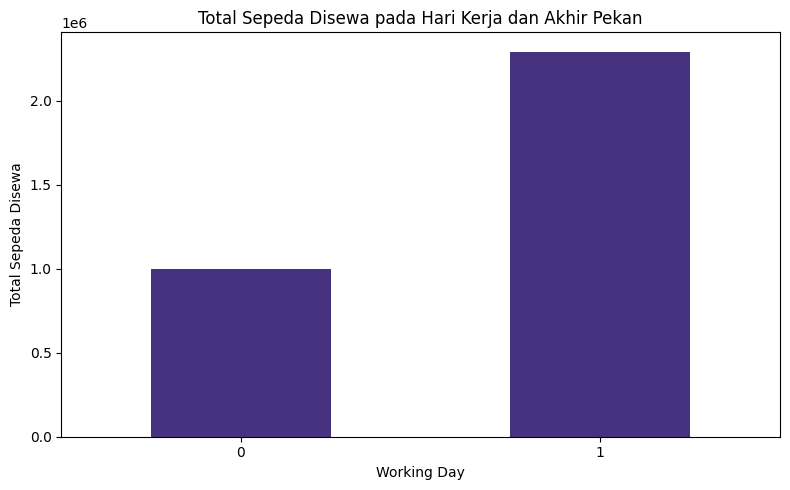

In [21]:
# Visualisasi dengan bar chart
plt.figure(figsize=(8, 5))
totalbike_workingday.plot(kind='bar', color=sns.color_palette()[::-1][-1])
plt.title('Total Sepeda Disewa pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Working Day')
plt.ylabel('Total Sepeda Disewa')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Jumlah sepeda yang disewa cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Hal ini dapat disebabkan karena kebutuhan transportasi sehari-hari para pekerja.

## Analisis Lanjutan (Klastering)

Analisis di sini dilakukan untuk mengetahui apakah terdapat pengaruh cuaca terhadap jumlah sepeda yang disewa atau tidak.


In [22]:
# Membuat kolom baru untuk klaster
bikesharing_df['klaster'] = None

# Mengelompokkan data berdasarkan kolom 'season' dan 'weathersit'
for index, row in bikesharing_df.iterrows():
    season = row['season']
    weathersit = row['weathersit']

    if (season == 2 or season == 3) and (weathersit == 1 or weathersit == 2): # semi panas -- cerah
        bikesharing_df.at[index, 'klaster'] = 0
    elif (season == 1 or season == 4) and (weathersit == 1 or weathersit == 2) : # salju gugur -- cerah
        bikesharing_df.at[index, 'klaster'] = 1
    elif (season == 2 or season == 3) and weathersit == 3: # semi panas -- tidak cerah
        bikesharing_df.at[index, 'klaster'] = 2
    else:
        bikesharing_df.at[index, 'klaster'] = 3 # salju gugur -- tidak cerah


<ipython-input-23-12b7b9ab40ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bikesharing_df, y='klaster', order=total_cnt_per_cluster.index, palette='viridis')


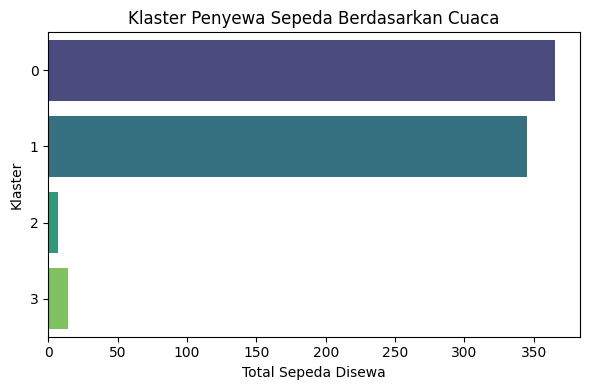

In [23]:
# Menghitung jumlah "cnt" untuk setiap klaster
total_cnt_per_cluster = bikesharing_df.groupby('klaster')['cnt'].sum()

plt.figure(figsize=(6, 4))
sns.countplot(data=bikesharing_df, y='klaster', order=total_cnt_per_cluster.index, palette='viridis')
plt.title('Klaster Penyewa Sepeda Berdasarkan Cuaca')
plt.xlabel('Total Sepeda Disewa')
plt.ylabel('Klaster')
plt.tight_layout()
plt.show()

Setiap klaster didefinisikan sebagai berikut:

- Klaster 0 = Musim Semi/Musim Panas - Cerah

- Klaster 1 = Musim Dingin/Musim Gugur - Cerah

- Klaster 2 = Musim Semi/Musim Panas - Tidak Cerah

- Klaster 3 = Musim Dingin/Musim Gugur - Tidak cerah

Dapat dilihat bahwa terdapat hubungan yang signifikan terhadap cuaca dengan pola peminjaman sepeda. Klaster 0 menjadi klaster yang paling banyak memiliki peminat dalam menyewa sepeda, diikuti dengan klaster 1, 3, dan 2.

Banyaknya sepeda yang disewa meski musim tidak sepenuhnya panas (klaster 1), cuaca yang cerah masih mendorong orang untuk menggunakan layanan penyewaan sepeda.

In [24]:
# Menyimpan dataframe menjadi CSV

bikesharing_df.to_csv('bikesharing.csv', index=False)

## Conclusion

- Performa penyewaan sepeda mengalami peningkatan yang signifikan dari tahun 2011 ke tahun 2012. Hal ini dapat dikarenakan masyarakat memiliki minat yang tinggi dalam jasa sewa sepeda mengingat kemudahan sistem bike sharing yang diberikan. Meskipun pengguna registered selalu lebih banyak, peningkatan jumlah pengguna casual juga berkontribusi pada pertumbuhan keseluruhan. Pengguna casual berpotensi menjadi pelanggan registered dengan cara memberi promosi khusus, mempermudah alur pendaftaran, atau memberi program loyalty. Melihat banyaknya pengguna 'registered', marketing yang digunakan bisa dikatakan berhasil menarik banyak orang untuk mendaftar. Meskipun demikian, tantangan utama yang dihadapi adalah mempertahankan dan meningkatkan penggunaan layanan di masa mendatang. Penting untuk terus memperbaiki kualitas layanan, memberikan pelayanan pelanggan yang baik, dan meluncurkan inovasi produk yang menarik.


- Jumlah sepeda yang disewa cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Peningkatan jumlah sepeda yang disewa pada hari kerja dapat disebabkan oleh kebutuhan transportasi sehari-hari para pekerja, seperti pergi ke kantor atau sekolah. Besar kemungkinan bahwa orang-orang cenderung menggunakan layanan penyewaan sepeda pada hari kerja untuk perjalanan sehari-hari mereka. Di sisi lain, pada hari libur, orang-orang mungkin memiliki waktu lebih luang dan berbagai kegiatan rekreasi, sehingga penggunaan layanan penyewaan sepeda tidak seintens pada hari kerja. Informasi ini dapat menjadi nilai tambah bagi penyedia layanan penyewaan sepeda untuk mengelola persediaan dan menyesuaikan strategi pemasaran, terutama pada hari-hari tertentu.

- Pola penggunaan layanan penyewaan sepeda sangat dipengaruhi oleh musim dan kondisi cuaca. Cuaca yang cerah cenderung meningkatkan jumlah penyewaan sepeda, terutama pada musim semi dan panas. Meskipun musim dingin atau gugur, cuaca yang tetap cerah masih dapat mempengaruhi penggunaan layanan, meskipun tidak seintens pada musim panas. Kondisi cuaca yang tidak bersahabat, terutama pada musim dingin atau gugur dan ketika tidak cerah, dapat mengurangi minat orang untuk menggunakan layanan penyewaan sepeda.